In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('../Data/dataset.csv')
df.shape

(4791, 16)

ultimately we need to create vectors for the features so that we can compute cosine similarity between the vectors so let us concatenate all the textual data into one column named info and let us analyse the numerical columns and think of how to add this information as well

But before that there is a small issue being spaces which can confuse like kamal hassan and kamal singh so we need to concatenate names and all these kind of features to avoid collision

In [90]:
def concatenate_names(df, column_name):
    df[column_name] = df[column_name].str.replace(' ', '', regex=False).str.lower()
    return df

# Assuming there is a column 'director' that needs to be processed
df = concatenate_names(df, 'director')


In [91]:
df = concatenate_names(df, 'genres')

In [92]:
df = concatenate_names(df, 'keywords')

In [93]:
df = concatenate_names(df, 'production_companies')

In [94]:
df

,title,cast,budget,genres,id,keywords,lang,overview,popularity,production_companies,revenue,runtime,vote_average,vote_count,release_year,director
0,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",237000000,"['action','adventure','fantasy','sciencefiction']",19995,"['cultureclash','future','spacewar','spacecolo...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['ingeniousfilmpartners','twentiethcenturyfoxf...",2787965087,162.0,7.2,11800,2009,['jamescameron']
1,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",300000000,"['adventure','fantasy','action']",285,"['ocean','drugabuse','exoticisland','eastindia...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['waltdisneypictures','jerrybruckheimerfilms',...",961000000,169.0,6.9,4500,2007,['goreverbinski']
2,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",245000000,"['action','adventure','crime']",206647,"['spy','basedonnovel','secretagent','sequel','...",en,A cryptic message from Bond’s past sends him o...,107.376788,"['columbiapictures','danjaq','b24']",880674609,148.0,6.3,4466,2015,['sammendes']
3,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",250000000,"['action','crime','drama','thriller']",49026,"['dccomics','crimefighter','terrorist','secret...",en,Following the death of District Attorney Harve...,112.312950,"['legendarypictures','warnerbros.','dcentertai...",1084939099,165.0,7.6,9106,2012,['christophernolan']
4,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",260000000,"['action','adventure','sciencefiction']",49529,"['basedonnovel','mars','medallion','spacetrave...",en,"John Carter is a war-weary, former military ca...",43.926995,['waltdisneypictures'],284139100,132.0,6.1,2124,2012,['andrewstanton']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",220000,"['action','crime','thriller']",9367,"['unitedstates–mexicobarrier','legs','arms','p...",es,El Mariachi just wants to play his guitar and ...,14.269792,['columbiapictures'],2040920,81.0,6.6,238,1992,['robertrodriguez']
4787,Newlyweds,"['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",9000,"['comedy','romance']",72766,[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],0,85.0,5.9,5,2011,['edwardburns']
4788,"Signed, Sealed, Delivered","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe']",0,"['comedy','drama','romance','tvmovie']",231617,"['date','loveatfirstsight','narration','invest...",en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['frontstreetpictures','museentertainmententer...",0,120.0,7.0,6,2013,['scottsmith']
4789,Shanghai Calling,"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton']",0,[],126186,[],en,When ambitious New York attorney Sam is sent t...,0.857008,[],0,98.0,5.7,7,2012,['danielhsia']


In [95]:
df = concatenate_names(df, 'cast')


In [96]:
df

,title,cast,budget,genres,id,keywords,lang,overview,popularity,production_companies,revenue,runtime,vote_average,vote_count,release_year,director
0,Avatar,"['samworthington','zoesaldana','sigourneyweaver']",237000000,"['action','adventure','fantasy','sciencefiction']",19995,"['cultureclash','future','spacewar','spacecolo...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['ingeniousfilmpartners','twentiethcenturyfoxf...",2787965087,162.0,7.2,11800,2009,['jamescameron']
1,Pirates of the Caribbean: At World's End,"['johnnydepp','orlandobloom','keiraknightley']",300000000,"['adventure','fantasy','action']",285,"['ocean','drugabuse','exoticisland','eastindia...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['waltdisneypictures','jerrybruckheimerfilms',...",961000000,169.0,6.9,4500,2007,['goreverbinski']
2,Spectre,"['danielcraig','christophwaltz','léaseydoux']",245000000,"['action','adventure','crime']",206647,"['spy','basedonnovel','secretagent','sequel','...",en,A cryptic message from Bond’s past sends him o...,107.376788,"['columbiapictures','danjaq','b24']",880674609,148.0,6.3,4466,2015,['sammendes']
3,The Dark Knight Rises,"['christianbale','michaelcaine','garyoldman']",250000000,"['action','crime','drama','thriller']",49026,"['dccomics','crimefighter','terrorist','secret...",en,Following the death of District Attorney Harve...,112.312950,"['legendarypictures','warnerbros.','dcentertai...",1084939099,165.0,7.6,9106,2012,['christophernolan']
4,John Carter,"['taylorkitsch','lynncollins','samanthamorton']",260000000,"['action','adventure','sciencefiction']",49529,"['basedonnovel','mars','medallion','spacetrave...",en,"John Carter is a war-weary, former military ca...",43.926995,['waltdisneypictures'],284139100,132.0,6.1,2124,2012,['andrewstanton']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,"['carlosgallardo','jaimedehoyos','petermarquar...",220000,"['action','crime','thriller']",9367,"['unitedstates–mexicobarrier','legs','arms','p...",es,El Mariachi just wants to play his guitar and ...,14.269792,['columbiapictures'],2040920,81.0,6.6,238,1992,['robertrodriguez']
4787,Newlyweds,"['edwardburns','kerrybishé','marshadietlein']",9000,"['comedy','romance']",72766,[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],0,85.0,5.9,5,2011,['edwardburns']
4788,"Signed, Sealed, Delivered","['ericmabius','kristinbooth','crystallowe']",0,"['comedy','drama','romance','tvmovie']",231617,"['date','loveatfirstsight','narration','invest...",en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['frontstreetpictures','museentertainmententer...",0,120.0,7.0,6,2013,['scottsmith']
4789,Shanghai Calling,"['danielhenney','elizacoupe','billpaxton']",0,[],126186,[],en,When ambitious New York attorney Sam is sent t...,0.857008,[],0,98.0,5.7,7,2012,['danielhsia']


In [97]:
text_columns = ['overview', 'director', 'genres', 'keywords', 'production_companies', 'cast']
df['info'] = df[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1).str.lower().str.replace(r'[\[\](){}]', '', regex=True).str.replace("'", '', regex=False)

In [98]:
df['info'] = df['info'].str.replace(',', ' ', regex=False)


In [99]:
df['info'][0]

'in the 22nd century  a paraplegic marine is dispatched to the moon pandora on a unique mission  but becomes torn between following orders and protecting an alien civilization. jamescameron action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d ingeniousfilmpartners twentiethcenturyfoxfilmcorporation duneentertainment lightstormentertainment samworthington zoesaldana sigourneyweaver'

In [100]:
df.drop(['cast','genres','keywords','overview','production_companies','director'],axis=1,inplace=True)

In [101]:
df

,title,budget,id,lang,popularity,revenue,runtime,vote_average,vote_count,release_year,info
0,Avatar,237000000,19995,en,150.437577,2787965087,162.0,7.2,11800,2009,in the 22nd century a paraplegic marine is di...
1,Pirates of the Caribbean: At World's End,300000000,285,en,139.082615,961000000,169.0,6.9,4500,2007,captain barbossa long believed to be dead ha...
2,Spectre,245000000,206647,en,107.376788,880674609,148.0,6.3,4466,2015,a cryptic message from bond’s past sends him o...
3,The Dark Knight Rises,250000000,49026,en,112.312950,1084939099,165.0,7.6,9106,2012,following the death of district attorney harve...
4,John Carter,260000000,49529,en,43.926995,284139100,132.0,6.1,2124,2012,john carter is a war-weary former military ca...
...,...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,220000,9367,es,14.269792,2040920,81.0,6.6,238,1992,el mariachi just wants to play his guitar and ...
4787,Newlyweds,9000,72766,en,0.642552,0,85.0,5.9,5,2011,a newlywed couples honeymoon is upended by the...
4788,"Signed, Sealed, Delivered",0,231617,en,1.444476,0,120.0,7.0,6,2013,"""signed sealed delivered"" introduces a dedic..."
4789,Shanghai Calling,0,126186,en,0.857008,0,98.0,5.7,7,2012,when ambitious new york attorney sam is sent t...


In [102]:
df['profit']=df['revenue']-df['budget']

In [103]:
df

,title,budget,id,lang,popularity,revenue,runtime,vote_average,vote_count,release_year,info,profit
0,Avatar,237000000,19995,en,150.437577,2787965087,162.0,7.2,11800,2009,in the 22nd century a paraplegic marine is di...,2550965087
1,Pirates of the Caribbean: At World's End,300000000,285,en,139.082615,961000000,169.0,6.9,4500,2007,captain barbossa long believed to be dead ha...,661000000
2,Spectre,245000000,206647,en,107.376788,880674609,148.0,6.3,4466,2015,a cryptic message from bond’s past sends him o...,635674609
3,The Dark Knight Rises,250000000,49026,en,112.312950,1084939099,165.0,7.6,9106,2012,following the death of district attorney harve...,834939099
4,John Carter,260000000,49529,en,43.926995,284139100,132.0,6.1,2124,2012,john carter is a war-weary former military ca...,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,220000,9367,es,14.269792,2040920,81.0,6.6,238,1992,el mariachi just wants to play his guitar and ...,1820920
4787,Newlyweds,9000,72766,en,0.642552,0,85.0,5.9,5,2011,a newlywed couples honeymoon is upended by the...,-9000
4788,"Signed, Sealed, Delivered",0,231617,en,1.444476,0,120.0,7.0,6,2013,"""signed sealed delivered"" introduces a dedic...",0
4789,Shanghai Calling,0,126186,en,0.857008,0,98.0,5.7,7,2012,when ambitious new york attorney sam is sent t...,0


In [104]:
df.drop(['revenue','budget'],axis=1,inplace=True)

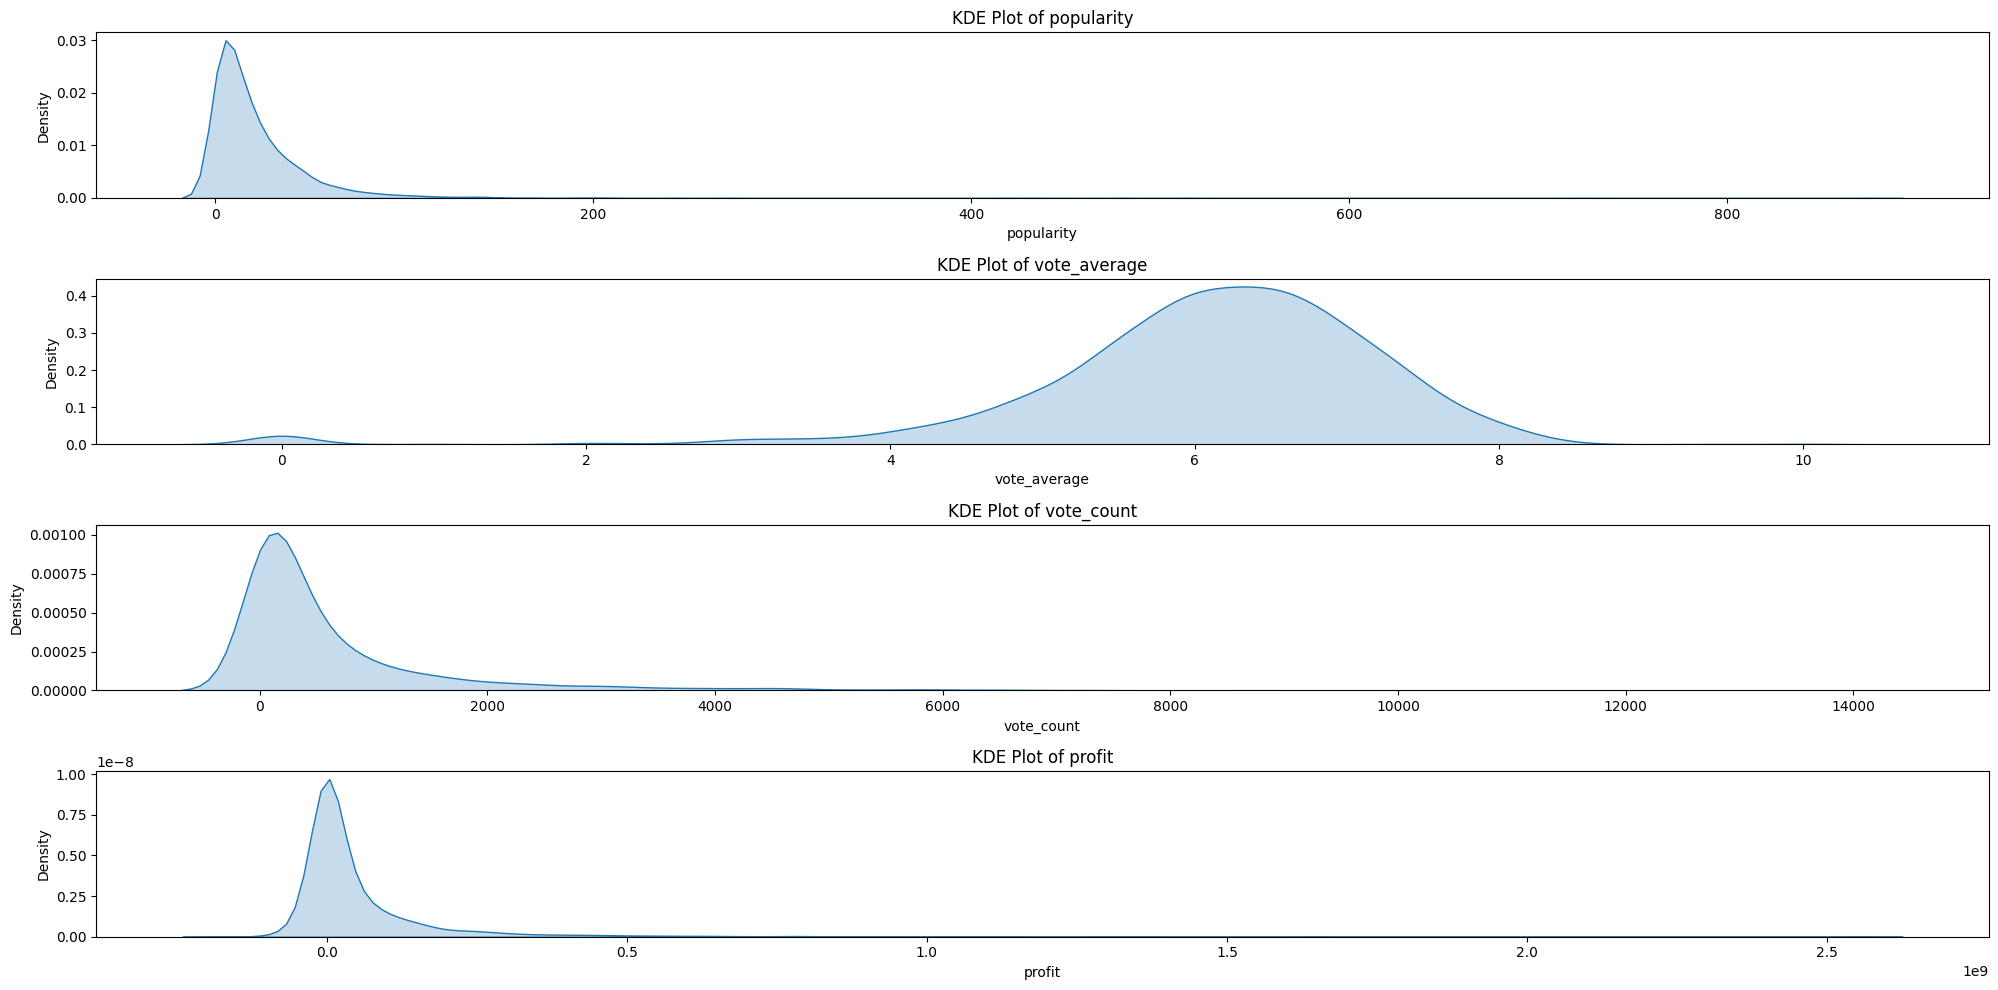

In [105]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'id']
numerical_columns = numerical_columns[numerical_columns != 'release_year']
numerical_columns = numerical_columns[numerical_columns != 'runtime']

plt.figure(figsize=(20, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
plt.tight_layout()
plt.show()


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [108]:
numerical_columns

Index(['popularity', 'vote_average', 'vote_count', 'profit'], dtype='object')

In [109]:
df

,title,id,lang,popularity,runtime,vote_average,vote_count,release_year,info,profit
0,Avatar,19995,en,4.048685,162.0,0.933099,8.990560,2009,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,en,3.692011,169.0,0.679694,3.082143,2007,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,en,2.696089,148.0,0.172885,3.054624,2015,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,en,2.851140,165.0,1.270971,6.810111,2012,following the death of district attorney harve...,5.742910
4,John Carter,49529,en,0.703046,132.0,0.003949,1.159075,2012,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,9367,es,-0.228526,81.0,0.426290,-0.367401,1992,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,en,-0.656575,85.0,-0.164987,-0.555985,2011,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,en,-0.631386,120.0,0.764162,-0.555176,2013,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,en,-0.649839,98.0,-0.333923,-0.554366,2012,when ambitious new york attorney sam is sent t...,-0.392024


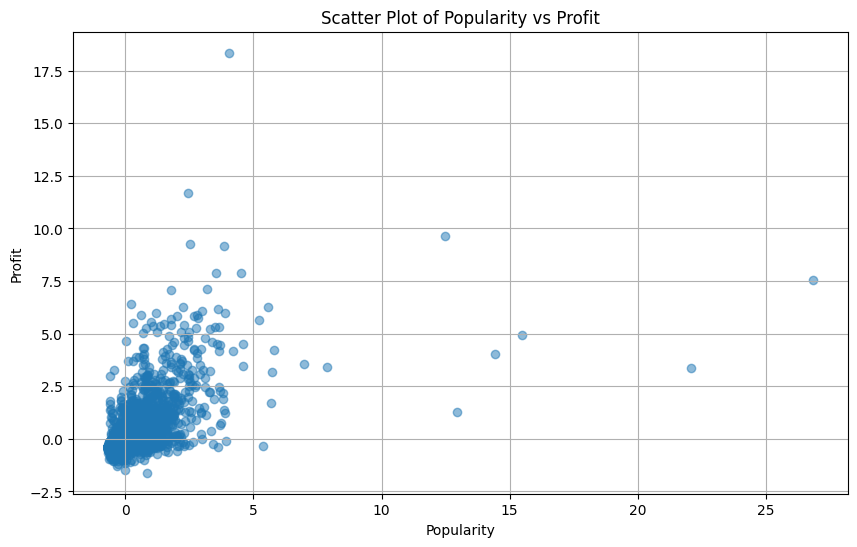

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['profit'], alpha=0.5)
plt.title('Scatter Plot of Popularity vs Profit')
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


In [111]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['popularity'], df['profit'])
print(f'Spearman correlation: {correlation}, p-value: {p_value}')


Spearman correlation: 0.604164743298104, p-value: 0.0


we are kind of shwowing that there is a relationship between populairty and profit

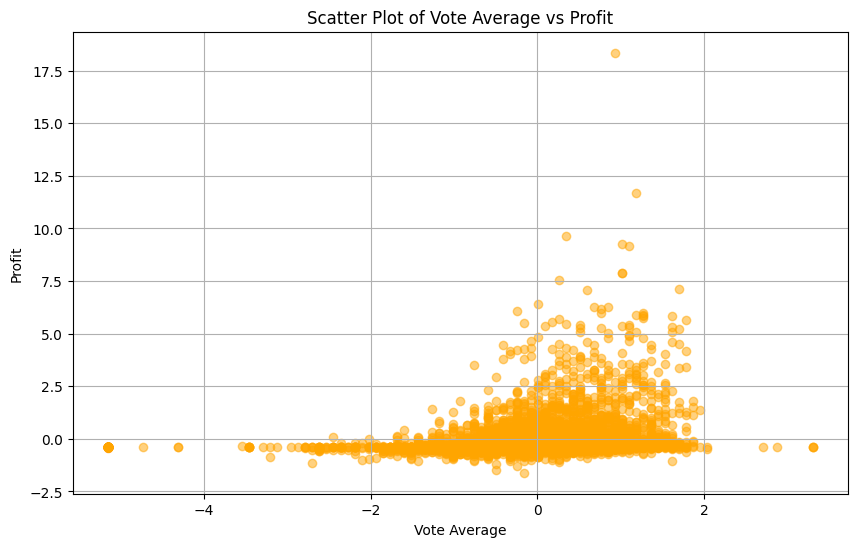

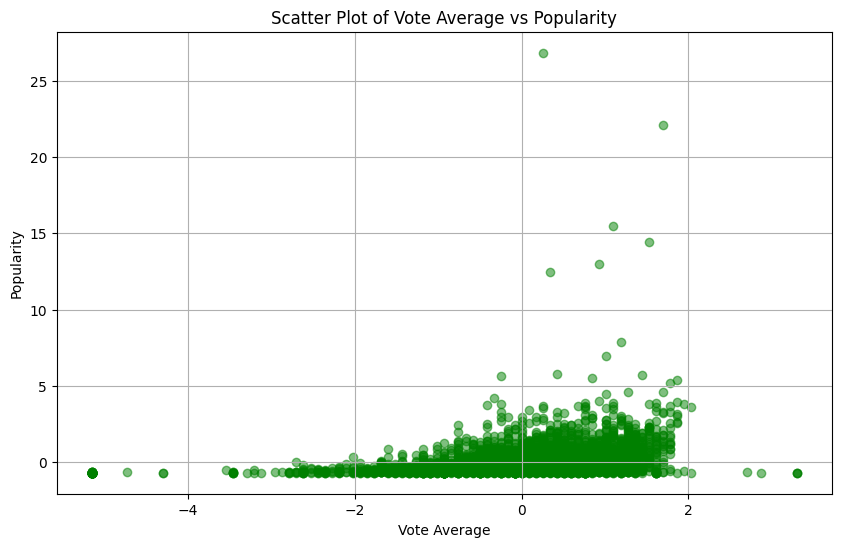

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['profit'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Vote Average vs Profit')
plt.xlabel('Vote Average')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['popularity'], alpha=0.5, color='green')
plt.title('Scatter Plot of Vote Average vs Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()



In [113]:
df

,title,id,lang,popularity,runtime,vote_average,vote_count,release_year,info,profit
0,Avatar,19995,en,4.048685,162.0,0.933099,8.990560,2009,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,en,3.692011,169.0,0.679694,3.082143,2007,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,en,2.696089,148.0,0.172885,3.054624,2015,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,en,2.851140,165.0,1.270971,6.810111,2012,following the death of district attorney harve...,5.742910
4,John Carter,49529,en,0.703046,132.0,0.003949,1.159075,2012,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...,...,...,...
4786,El Mariachi,9367,es,-0.228526,81.0,0.426290,-0.367401,1992,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,en,-0.656575,85.0,-0.164987,-0.555985,2011,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,en,-0.631386,120.0,0.764162,-0.555176,2013,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,en,-0.649839,98.0,-0.333923,-0.554366,2012,when ambitious new york attorney sam is sent t...,-0.392024


In [115]:
df['infoo'] = df['info'] + df.apply(lambda row: f" release in the year {row['release_year']} lang {row['lang']}", axis=1)


In [117]:
df['infoo'][0]

'in the 22nd century  a paraplegic marine is dispatched to the moon pandora on a unique mission  but becomes torn between following orders and protecting an alien civilization. jamescameron action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d ingeniousfilmpartners twentiethcenturyfoxfilmcorporation duneentertainment lightstormentertainment samworthington zoesaldana sigourneyweaver release in the year 2009 lang en'

In [118]:
df.drop(['lang','release_year'],axis=1,inplace=True)

In [119]:
df['info']=df['infoo']

In [120]:
df.drop(['infoo'],axis=1,inplace=True)

In [123]:
df

,title,id,popularity,runtime,vote_average,vote_count,info,profit
0,Avatar,19995,4.048685,162.0,0.933099,8.990560,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,3.692011,169.0,0.679694,3.082143,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,2.696089,148.0,0.172885,3.054624,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,2.851140,165.0,1.270971,6.810111,following the death of district attorney harve...,5.742910
4,John Carter,49529,0.703046,132.0,0.003949,1.159075,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...,...
4786,El Mariachi,9367,-0.228526,81.0,0.426290,-0.367401,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,-0.656575,85.0,-0.164987,-0.555985,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,-0.631386,120.0,0.764162,-0.555176,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,-0.649839,98.0,-0.333923,-0.554366,when ambitious new york attorney sam is sent t...,-0.392024


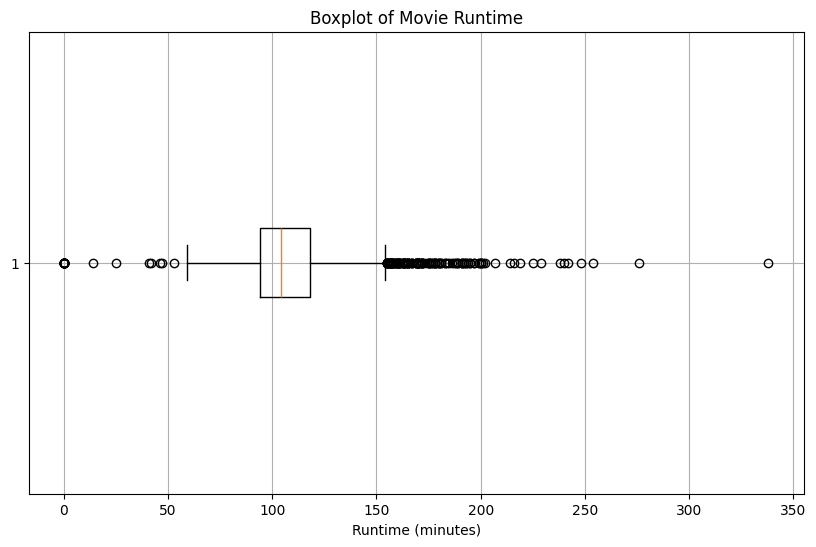

In [125]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['runtime'], vert=False)
plt.title('Boxplot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.grid(True)
plt.show()


In [126]:
df[df['runtime']>240]

,title,id,popularity,runtime,vote_average,vote_count,info,profit
1125,Cleopatra,8095,-0.260736,248.0,0.510758,-0.441864,historical epic. the triumphs and tragedy of t...,-0.098959
1922,Gettysburg,10655,-0.503085,254.0,0.426290,-0.487189,summer 1863. the confederacy pushes north into...,-0.208330
2373,Hamlet,10549,-0.368463,242.0,1.017567,-0.465335,hamlet prince of denmark returns home to fin...,-0.392024
2384,Carlos,43434,-0.641001,338.0,0.510758,-0.519563,the story of venezuelan revolutionary ilich r...,-0.517882
2631,The Company,112430,-0.630103,276.0,0.764162,-0.550320,real-life figures from the cold war era mix wi...,-0.392024


In [127]:
df=df[df['runtime']<240]

In [128]:
df

,title,id,popularity,runtime,vote_average,vote_count,info,profit
0,Avatar,19995,4.048685,162.0,0.933099,8.990560,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,3.692011,169.0,0.679694,3.082143,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,2.696089,148.0,0.172885,3.054624,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,2.851140,165.0,1.270971,6.810111,following the death of district attorney harve...,5.742910
4,John Carter,49529,0.703046,132.0,0.003949,1.159075,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...,...
4786,El Mariachi,9367,-0.228526,81.0,0.426290,-0.367401,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,-0.656575,85.0,-0.164987,-0.555985,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,-0.631386,120.0,0.764162,-0.555176,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,-0.649839,98.0,-0.333923,-0.554366,when ambitious new york attorney sam is sent t...,-0.392024


In [129]:
df['runtime'] = df['runtime'].apply(lambda x: 'shortMovie' if x < 60 else ('longMovie' if x > 150 else 'mediumLength'))


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_55569/4021912940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime'] = df['runtime'].apply(lambda x: 'shortMovie' if x < 60 else ('longMovie' if x > 150 else 'mediumLength'))


In [130]:
df

,title,id,popularity,runtime,vote_average,vote_count,info,profit
0,Avatar,19995,4.048685,longMovie,0.933099,8.990560,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,3.692011,longMovie,0.679694,3.082143,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,2.696089,mediumLength,0.172885,3.054624,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,2.851140,longMovie,1.270971,6.810111,following the death of district attorney harve...,5.742910
4,John Carter,49529,0.703046,mediumLength,0.003949,1.159075,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...,...
4786,El Mariachi,9367,-0.228526,mediumLength,0.426290,-0.367401,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,-0.656575,mediumLength,-0.164987,-0.555985,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,-0.631386,mediumLength,0.764162,-0.555176,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,-0.649839,mediumLength,-0.333923,-0.554366,when ambitious new york attorney sam is sent t...,-0.392024


In [131]:
df['info'] = df['info'] + ' ' + df['runtime'].astype(str)
df.drop(['runtime'], axis=1, inplace=True)


/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_55569/975085013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['info'] = df['info'] + ' ' + df['runtime'].astype(str)
/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_55569/975085013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['runtime'], axis=1, inplace=True)


In [134]:
df

,title,id,popularity,vote_average,vote_count,info,profit
0,Avatar,19995,4.048685,0.933099,8.990560,in the 22nd century a paraplegic marine is di...,18.351862
1,Pirates of the Caribbean: At World's End,285,3.692011,0.679694,3.082143,captain barbossa long believed to be dead ha...,4.464847
2,Spectre,206647,2.696089,0.172885,3.054624,a cryptic message from bond’s past sends him o...,4.278762
3,The Dark Knight Rises,49026,2.851140,1.270971,6.810111,following the death of district attorney harve...,5.742910
4,John Carter,49529,0.703046,0.003949,1.159075,john carter is a war-weary former military ca...,-0.214656
...,...,...,...,...,...,...,...
4786,El Mariachi,9367,-0.228526,0.426290,-0.367401,el mariachi just wants to play his guitar and ...,-0.378644
4787,Newlyweds,72766,-0.656575,-0.164987,-0.555985,a newlywed couples honeymoon is upended by the...,-0.392090
4788,"Signed, Sealed, Delivered",231617,-0.631386,0.764162,-0.555176,"""signed sealed delivered"" introduces a dedic...",-0.392024
4789,Shanghai Calling,126186,-0.649839,-0.333923,-0.554366,when ambitious new york attorney sam is sent t...,-0.392024


since our aim to reccommend similar story movie and not be baised by hit movies or flop ones so we will remove the columns 

In [135]:
df.drop(['popularity','vote_average','vote_count','profit'],axis=1,inplace=True)

/var/folders/7w/qs77cz_11630n9gydm61vjpc0000gn/T/ipykernel_55569/490344208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['popularity','vote_average','vote_count','profit'],axis=1,inplace=True)


In [137]:
df=df[['id','title','info']]

In [138]:
df

,id,title,info
0,19995,Avatar,in the 22nd century a paraplegic marine is di...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead ha...
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,john carter is a war-weary former military ca...
...,...,...,...
4786,9367,El Mariachi,el mariachi just wants to play his guitar and ...
4787,72766,Newlyweds,a newlywed couples honeymoon is upended by the...
4788,231617,"Signed, Sealed, Delivered","""signed sealed delivered"" introduces a dedic..."
4789,126186,Shanghai Calling,when ambitious new york attorney sam is sent t...


In [141]:
a=df['info'].str.len()

In [143]:
a.describe()

count    4785.000000
mean      555.510345
std       184.399201
min        72.000000
25%       419.000000
50%       542.000000
75%       660.000000
max      1608.000000
Name: info, dtype: float64